# Reconocimiento de patrones y aprendizaje automático

## Tarea 4: Clustering

#### Profesor: Andrés Aldana Gonzáles<br> Ayudante: Felipe Navarrete Córdova<br> Alumno: Ricardo Eduardo Rivas Roa
Fecha de entrega: Lunes 31 de enero de 2022

## 1. Introducción
El archivo iris.csv contiene información sobre las mediciones de 150 lirios: 3 clases diferentes con 50 instancias cada una. Cada columna del archivo representa la siguiente información:
* Longitud del sépalo (cm.)
* Ancho del sépalo (cm.)
* Longitud del pétalo (cm.)
* Ancho del pétalo (cm.)
* Tipo de lirio

## 2.Ejercicios
1. Utiliza los algoritmos Hierarchical clustering, K-Means y DBSCAN para obtener los grupos (clusters) de las diferentes clases de lirios.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

In [2]:
#abrimos los datos del csv
df=pd.read_csv('iris.csv', header=None, names=['longitud_sepalo','ancho_sepalo','longitud_petalo','ancho_petalo','clase'])
df.head()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#no hay datos nan
df.isnull().sum()

longitud_sepalo    0
ancho_sepalo       0
longitud_petalo    0
ancho_petalo       0
clase              0
dtype: int64

In [4]:
#clases por petalo
df.clase.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: clase, dtype: int64

In [5]:
#se hace la separacion de features y targets
X = df.drop('clase', axis=1)
y = df['clase']

In [6]:
#codigo para insertar una columna numerica de clases
ordinal_encoder = OrdinalEncoder()
df['clase_numerica'] = ordinal_encoder.fit_transform(df.clase.values.reshape(-1, 1))
df

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase,clase_numerica
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2.0
146,6.3,2.5,5.0,1.9,Iris-virginica,2.0
147,6.5,3.0,5.2,2.0,Iris-virginica,2.0
148,6.2,3.4,5.4,2.3,Iris-virginica,2.0


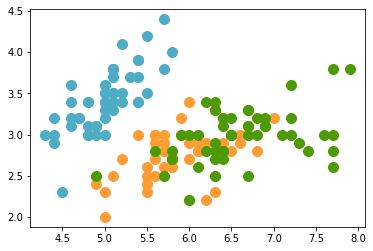

In [23]:
#grafica de clases verdaderas
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]#"blue", "orange","green"
for k, col in enumerate(colors):
    actual_class = np.array(df.clase_numerica) == k
    plt.scatter(X.iloc[actual_class, 0], X.iloc[actual_class, 1], c=col, marker="o", s=100)

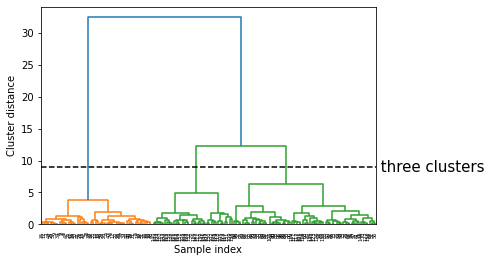

In [8]:
#hierarchcal clustering
linkage_array = ward(X)
#Se grafica el dendograma por linkage_array conteniendo las distancias entre clusters
dendrogram(linkage_array)
#Se marca el corte donde se tienen 3 clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [9, 9], '--', c='k')
ax.text(bounds[1], 9, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

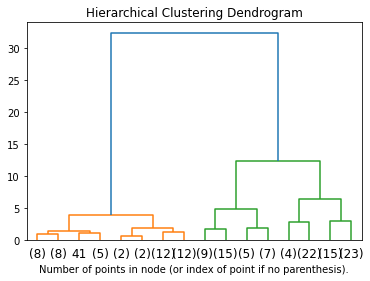

In [25]:
#probando hierarchicall clustering
hierClus= AgglomerativeClustering(distance_threshold=None, n_clusters=3)
hierClus=hierClus.fit(X)

#de la documentación de Sklearn
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


#iris = load_iris()
#X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=10, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

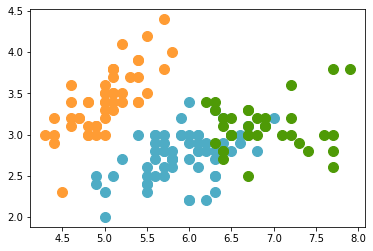

In [26]:
hierarchical=model.fit_predict(X)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]#"blue", "orange","green"
for k, col in enumerate(colors):
    cluster_data = hierarchical == k
    plt.scatter(X.iloc[cluster_data, 0], X.iloc[cluster_data, 1], c=col, marker="o", s=100)

In [10]:
#k-means clustering
kmeans = KMeans(3, init='random')
clusters_k = kmeans.fit_predict(X)

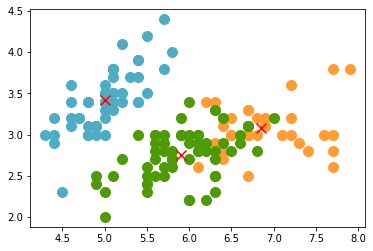

In [11]:
#grafica kmeans
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]#"blue", "orange","green"
centers = kmeans.cluster_centers_
for k, col in enumerate(colors):
    cluster_data = clusters_k == k
    plt.scatter(X.iloc[cluster_data, 0], X.iloc[cluster_data, 1], c=col, marker="o", s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)

In [12]:
#Modelo DBSCAN
dbscan = DBSCAN()
clusters_db = dbscan.fit_predict(X)

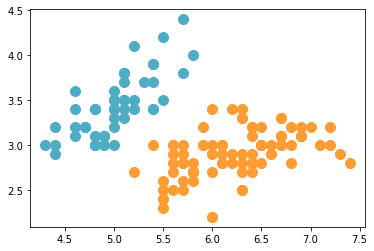

In [13]:
#grafica dbscan
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]#"blue", "orange","green"
for k, col in enumerate(colors):
    cluster_data = clusters_db == k
    plt.scatter(X.iloc[cluster_data, 0], X.iloc[cluster_data, 1], c=col, marker="o", s=100)

2. Utiliza al menos tres formas de evaluar los resultados de los algoritmos utilizados (Disimilaridad, pureza, entropía, inercia, Silhouette).

Text(0, 0.5, 'silohuette_score')

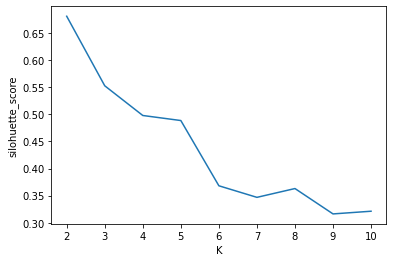

In [14]:
#Silhoutte
ks = [2, 3, 4, 5, 6, 7, 8, 9, 10]
scores = []
for k in ks:
    kmeans = KMeans(k)
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(ks, scores)
plt.xlabel('K')
plt.ylabel('silohuette_score')

In [15]:
#Pureza
#La pureza es análoga a la metrica accuracy. Y como ya conocemos las clases podemos usar este score 
#para K-Means y para DBSCAN
print('Purity para K-Means:',accuracy_score(df['clase_numerica'], clusters_k))
print('Purity para DBSCAN:',accuracy_score(df['clase_numerica'], clusters_db))

Purity para K-Means: 0.44
Purity para DBSCAN: 0.62


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


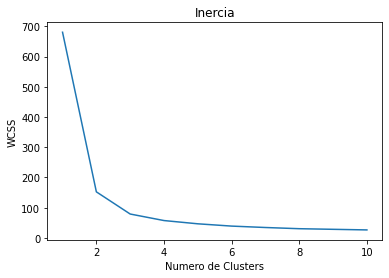

In [16]:
#inercia

wcss=[]#whithin clusters sum of squares es la inercia

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
#Grafica de resultado WCSS para formar en codo de Jambu
plt.plot(range(1,11), wcss)
plt.title("Inercia")
plt.xlabel("Numero de Clusters")
plt.ylabel("WCSS")
plt.show()

3. Recuerda que K-Means es sensible a las posiciones iniciales de los centroides. Realiza varias ejecuciones con posiciones iniciales diferentes.

In [17]:
print('Dominio de feature_0: ',X.iloc[:,0].min(),'-',X.iloc[:,0].max())
print('Dominio de feature_1: ',X.iloc[:,1].min(),'-',X.iloc[:,1].max())
print('Dominio de feature_2: ',X.iloc[:,2].min(),'-',X.iloc[:,2].max())
print('Dominio de feature_3: ',X.iloc[:,3].min(),'-',X.iloc[:,3].max())

Dominio de feature_0:  4.3 - 7.9
Dominio de feature_1:  2.0 - 4.4
Dominio de feature_2:  1.0 - 6.9
Dominio de feature_3:  0.1 - 2.5


x center values [5.006     5.9016129 6.85     ]
y center values [3.418      2.7483871  3.07368421]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


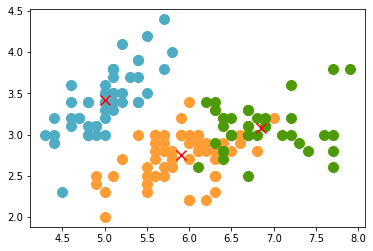

In [18]:
#k-means clustering centroides 1
kmeans = KMeans(3, init=np.array([[4.5,3,2,2],[7,4,6,2],[7.1,4,6,2]]))#se especifican los centroides
clusters_k = kmeans.fit_predict(X)
#grafica kmeans
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]#"blue", "orange","green"
centers = kmeans.cluster_centers_
for k, col in enumerate(colors):
    cluster_data = clusters_k == k
    plt.scatter(X.iloc[cluster_data, 0], X.iloc[cluster_data, 1], c=col, marker="o", s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)
print('x center values',centers[:, 0])
print('y center values',centers[:, 1])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


x center values [5.88360656 5.006      6.85384615]
y center values [2.74098361 3.418      3.07692308]


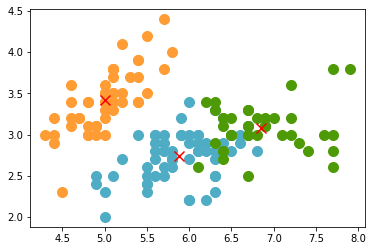

In [19]:
#k-means clustering centroides 2
kmeans = KMeans(3, init=np.array([[5,3,4,1],[7,7,7,7],[7.1,3,6,2.5]]))#se especifican los centroides
clusters_k = kmeans.fit_predict(X)
#grafica kmeans
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]#"blue", "orange","green"
centers = kmeans.cluster_centers_
for k, col in enumerate(colors):
    cluster_data = clusters_k == k
    plt.scatter(X.iloc[cluster_data, 0], X.iloc[cluster_data, 1], c=col, marker="o", s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)
print('x center values',centers[:, 0])
print('y center values',centers[:, 1])

x center values [5.006     6.85      5.9016129]
y center values [3.418      3.07368421 2.7483871 ]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


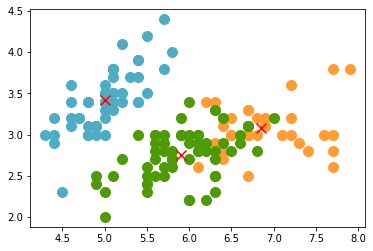

In [20]:
#k-means clustering centroides 3
kmeans = KMeans(3, init=np.array([[1,1,1,1],[8,8,8,8],[15,15,15,15]]))#se especifican los centroides
clusters_k = kmeans.fit_predict(X)
#grafica kmeans
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]#"blue", "orange","green"
centers = kmeans.cluster_centers_
for k, col in enumerate(colors):
    cluster_data = clusters_k == k
    plt.scatter(X.iloc[cluster_data, 0], X.iloc[cluster_data, 1], c=col, marker="o", s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)
print('x center values',centers[:, 0])
print('y center values',centers[:, 1])

Se puede ver en los prints que los centroides al final cambian un poco, sin embargo no cambian demasiado. Probablemente alterando el numero de iteraciones el cambio puede ser muy drástico

4. Recuerda que DBSCAN es sensible al radio ($\epsilon$) y al número de elementos en la vecindad(MinPts). Prueba diferentes valores de estos parámetros hasta que estés conforme con el agrupamiento realizado.

Purity para este DBSCAN: 0.7866666666666666


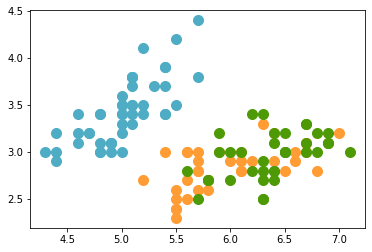

In [21]:
#Modelo DBSCAN con rad
dbscan = DBSCAN(eps=0.41,min_samples=4)
clusters_db = dbscan.fit_predict(X)
#grafica dbscan
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]#"blue", "orange","green"
for k, col in enumerate(colors):
    cluster_data = clusters_db == k
    plt.scatter(X.iloc[cluster_data, 0], X.iloc[cluster_data, 1], c=col, marker="o", s=100)
print('Purity para este DBSCAN:',accuracy_score(df['clase_numerica'], clusters_db))

Después de varias pruebas y calculando el purity del cluster al final decidí que $\epsilon=0.41$ y $MinPts=4$ es el valor que mejor clasifica los datos.

5. ¿Cuál es el número óptimo de clusters para este conjunto de datos? Justifica tu respuesta.

$R.$ El número óptimo de clusters parece ser 2, pero esto es debido a que la clase 2 y 3 estan muy encimadas una sobre la otra, sin embargo para que este clasificador se pueda usar para las clases disponibles es ideal que se hagan 3 clusters. Particularmente para K-Means, en la prueba de inercia, parece indicar que un clasificador de 2 o 3 clusters son suficientemente buenos.

6. Compara los resultados entre los diferentes algoritmos de agrupamiento, ¿Cuál es el mejor algoritmo para clasificar este conjunto de datos?

$R.$ K-Means es el que clasifica mejor este tipo de datos.

7. Interpreta los resultados:
* ¿Cuáles son las características comunes de cada grupo? ¿Cuáles son sus diferencias?

$R$ La setosa es la que mas se diferencia entre los grupos. La versicolor y la virginica sí tienen diferencias, sin embargo existe una superposición en algunas de sus caracteristicas de modo que es muy difícil crear un cluster para cada grupo.

* ¿Los grupos coinciden con los tipos de lirios? De no ser así, ¿hay más o menos grupos que tipos de lirios? ¿Cuál es el significado de esta diferencia?

$R.$ Para K-Means los grupos sí coinciden con los tipos de lirios aunque sólo en un 89% para los grupos que están encimados, para DBSCAN los grupos coinciden si mueves los parámetros y aún así no se adaptan muy bien. 

## Referencias
* Aurelien Geron - Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow-O’reilly (2019). Chapter 3 - Classification
* Müller, A., & Guido, S. (2016). Introduction to machine learning with Python (1st ed.). Sebastopol, CA: O'Reilly.
* VanderPlas, J. (2016). Python Data Science Handbook (1st ed.). Sebastopol, California: O'Reilly. Retrieved 11 November 2021 from https://jakevdp.github.io/PythonDataScienceHandbook/